In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Diffusion function
# Arguments for func:
# func1: 1/(1+s/λ²)
# func2: exp[-s/(2λ²)]

def g(s, λ = 1, func = "func1"):
    if func == "func1":
        return 1/(1+s/λ**2)
    elif func == "func2":
        return np.exp(-s/(2*λ**2))
    else:
        raise("Invalid function")

# Test function
def f(x, alpha):
    first = 5-np.tanh(alpha*(x-1))-np.tanh(alpha*(x-2))
    second = np.tanh(alpha*(x-4)) + np.tanh(alpha*(x-5)) + 0.1*(np.sin(5*x))**2*np.sin(50*x)
    return first+second

f = lambda x, α: 5 - np.tanh(α*(x-1)) - np.tanh(α*(x-2)) \
    + np.tanh(α*(x-4)) + np.tanh(α*(x-5)) \
    + 0.1*np.sin(x)**2 * np.sin(50*x)

In [3]:
# Create random 1D function
def generate_random1D(M):
    I = np.zeros(M+2)
    s = (M + 2)//5
    for i in range(5):
        I[i*s:(i+1)*s+1] = 10*np.random.randint(1, 5)
    I[-1] = I[-2]
    I = I + np.random.normal(0, 2, size = M+2)
    return I

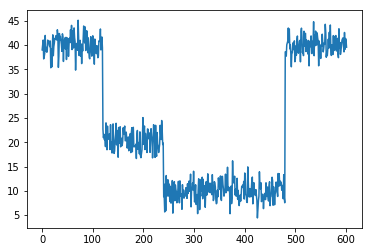

In [11]:
# Number of points in x- and y-direction respectively
M = 600
N = 50

#Spatial steps
dx = 1/(M+1)
dy = 1/(N+1)

# Number of iterations, and timestep
T = 2000
dt = 0.01

r = dt/(2*dx**2)

np.random.seed(1337)
I = generate_random1D(M)
plt.plot(I)
plt.show()


# Initiate grid
U = np.zeros((T, M+2))
# U[0] = f(np.linspace(0, 6, M+2), 30)
U[0] = I

In [5]:
# Forward difference matrix(with backward for last)
Dx = -1 * np.eye(M+2,k = -1) + 1 * np.eye(M+2, k = 1)
Dx[0,:] = 0
Dx[-1,:] = 0
Dx /= dx

Γ = np.eye(M+2, k = 0) + np.eye(M+2, k = 1)
Γ[0,:3] = [0, 1/2, 1/2]
Γ[-1,-2:] = [-1/2, -1/2]

Ω = (-1) * np.eye(M+2, k = -1) + (-2)*np.eye(M+2, k = 0) + (-1) * np.eye(M+2, k = -1)
Ω[0,:3] = [1/2, 0, -1/2]
Ω[-1,-3:] = [-1/2, 0, 1/2]

Ξ = np.eye(M+2, k = 0) + np.eye(M+2, k = -1)
Ξ[0, :2] = [-1/2, -1/2]
Ξ[-1, -2:] = [1/2, 1/2]

In [15]:
A = np.zeros((M+2, M+2))
for it in range(T-1):
    G = g(Dx.dot(U[it])**2, func = "func1")
    γ = Γ.dot(U[it])
    ω = Ω.dot(U[it])
    ξ = Ξ.dot(U[it])
    A[0, :3] = [ξ[0], ω[0], γ[0]]
    A[-1, -3:] = [ξ[-1], ω[-1], γ[-1]]
    for i in range(1, M+1):
        A[i, i-1:i+2] = [ξ[i], ω[i], γ[i]]
    U[it+1] = (np.identity(M+2) + r * A).dot(U[it])

IndexError: index 600 is out of bounds for axis 0 with size 600

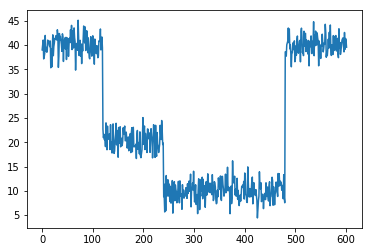

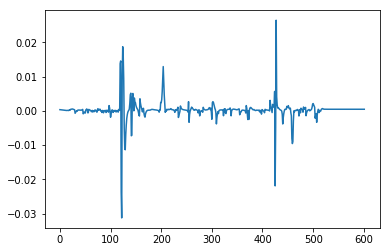

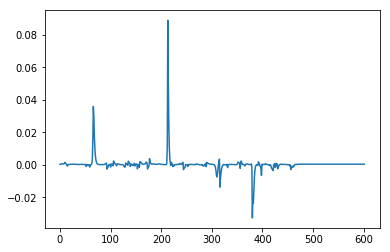

In [16]:
plt.figure()
plt.plot(U[0])

plt.figure()
plt.plot(U[T//2])

plt.figure()
plt.plot(U[-1])
plt.show()

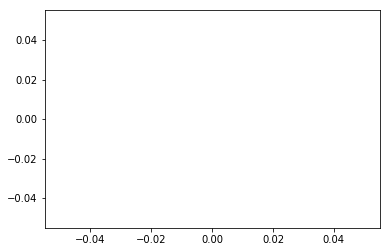

In [8]:
plt.plot(U[500])
plt.show()

Prøve Implisitt også:

In [13]:
# Number of points in x- and y-direction respectively
M = 600
N = 50

#Spatial steps
dx = 1/(M+1)
dy = 1/(N+1)

# Number of iterations, and timestep
T = 100
dt = 0.1

# Initiate grid
U = np.zeros((T, M+2))
# U[0] = f(np.linspace(0, 6, M+2), 30)
U[0] = I

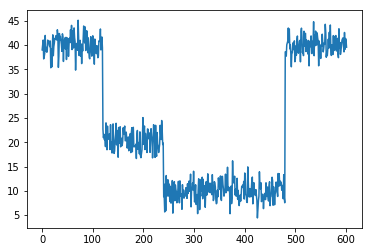

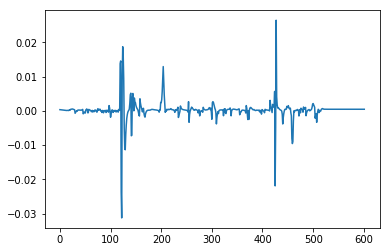

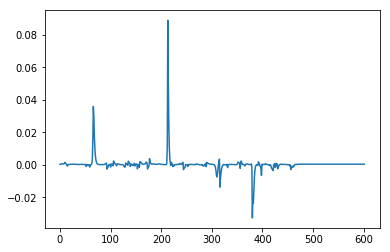

In [14]:
A = np.zeros((M+2, M+2))
for it in range(T-1):
    G = g(Dx.dot(U[it])**2, func = "func2")
    γ = Γ.dot(U[it])
    ω = Ω.dot(U[it])
    ξ = Ξ.dot(U[it])
    A[0, :3] = [ξ[0], ω[0], γ[0]]
    A[-1, -3:] = [ξ[-1], ω[-1], γ[-1]]
    for i in range(1, M+1):
        A[i, i-1:i+2] = [ξ[i], ω[i], γ[i]]
    U[it+1] = np.linalg.solve((np.identity(M+2) - r * A), U[it])
    
    
plt.figure()
plt.plot(U[0])

plt.figure()
plt.plot(U[T//2])

plt.figure()
plt.plot(U[-1])
plt.show()